In [ ]:
#불러오기

# 기본
import pandas as pd
import numpy as np

# 서브
from random import randint, uniform  # randint(a,b) a이상b이하에서 정수 '하나'를 뽑는다 유니폼은 소수하나
from scipy.stats import randint, uniform  # 랜덤랜드인트랑 조금 다르다 변수로 랜드인트/유니폼을 선언한 후 변수.rvs(사이즈값)까지 입력을 해야 어레이로 랜덤 값을 반환한다 / uniform(0,1).rvs(1000) 이렇게도 가능 0~1사이의 소수를 1000개 뽑는다

# 데이터 
from sklearn.model_selection import train_test_split   #데이터분할

# 데이터 정규화
from sklearn.preprocessing import MinMaxScaler # 정규화
from sklearn.preprocessing import StandardScaler  # 정규화 (제트스코어) 
from scipy.special import softmax # 소프트맥스 :0~1사이의 값으로 정규화하며 출력한다. 출력 값들의 총합은 항상 1이 되는 특성을 가졌다

# 데이터 분석
from scipy.special import expit  # 결정함수를 받아서 원소별 1값의 확률을 계산한다

# 시각화
import matplotlib.pyplot as plt   # 점그래프, 선그래프
import seaborn as sns  # 시본: 종합그래프
from sklearn.tree import plot_tree # 결정트리 선언,핏 후 plot_tree(결정트리변수) plt.figur(figsize=(숫자,숫자)) plt.show() 로 결정트리를 시각화 한다

# 모델
from sklearn.linear_model import  LogisticRegression, LinearRegression, Lasso,  Ridge   # 선형회귀 모델
from sklearn.linear_model import SGDRegressor, SGDClassifier  # 선형회귀 모델
from sklearn.neighbors import KNeighborsClassifier  # K 이웃 알고리즘 , 뉴데이터와 근접한 다른 밸류들을 찾아서 y를 예측하는 모델
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor # 결정트리 모델
from sklearn.ensemble import RandomForestClassifier # 베깅(의사결정트리) 결정트리 모델, 기존 결정트리의 단점을 보완하고 장점은 그대로 가져간다, 의
from sklearn.naive_bayes import GaussianNB # 분류

# 앙상블
from sklearn.ensemble import VotingClassifier

# 파라미터 최적화
from sklearn.model_selection import GridSearchCV # 모델을 검사해서 최적의 파라미터 값을 찾을 수 있게 도와준다
from sklearn.model_selection import RandomizedSearchCV # 최적파라미터찾기, 모든 경우를 연산하는 그리드서치와는 다르게 라이트하게 작동하는 것이 특징

# 모델 평가
from sklearn.metrics import mean_squared_error,  mean_absolute_error,   r2_score  # 회귀모델의 평가지표 -  ( 실y값, 모델의예측y)
from sklearn.model_selection import cross_validate # 변수 = cross_validate(모델,x_data,y_data) # 트레인+벨리데이션 셋을 스스로 여러번 나눠서 교차검증한다

# 혼돈 매트릭스
from sklearn.metrics import confusion_matrix  # 혼돈매트릭스
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score #혼돈매트릭스 성능평가

#
import sklearn
import sklearn.preprocessing
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier
 
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
#파일리드

train = pd.read_csv('train.csv', index_col='no')
test = pd.read_csv('test.csv', index_col='no')
submission = pd.read_csv('sample_submission.csv', index_col='no')
#행렬 확인
print(train.shape, test.shape, submission.shape)

(29305, 15) (19537, 14) (19537, 1)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0    22260
1     7045
Name: income, dtype: int64

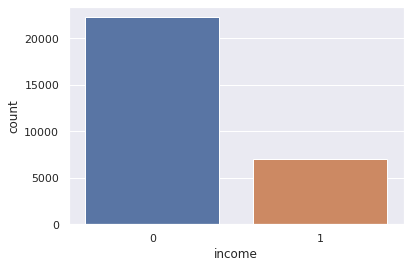

In [ ]:
sns.countplot(train['income'])
train['income'].value_counts()
#트레인 아웃풋확인

In [ ]:
print(train.isnull().sum())
print(test.isnull().sum())
#결측치 없음 확인

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64


In [ ]:
#타입확인
test.info()
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19537 entries, 29306 to 48842
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             19537 non-null  int64 
 1   workclass       19537 non-null  object
 2   fnlwgt          19537 non-null  int64 
 3   education       19537 non-null  object
 4   education-num   19537 non-null  int64 
 5   marital-status  19537 non-null  object
 6   occupation      19537 non-null  object
 7   relationship    19537 non-null  object
 8   race            19537 non-null  object
 9   sex             19537 non-null  object
 10  capital-gain    19537 non-null  int64 
 11  capital-loss    19537 non-null  int64 
 12  hours-per-week  19537 non-null  int64 
 13  native-country  19537 non-null  object
dtypes: int64(6), object(8)
memory usage: 2.2+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 29305 entries, 1 to 29305
Data columns (total 15 columns):
 #   Column          Non

In [ ]:
#드랍완료

train = train.drop(columns='fnlwgt')
test = test.drop(columns='fnlwgt')

train = train.drop(columns='capital-loss')
test = test.drop(columns='capital-loss')

train = train.drop(columns='native-country')
test = test.drop(columns='native-country')

train = train.drop(columns='hours-per-week')
test = test.drop(columns='hours-per-week')

train = train.drop(columns='capital-gain')
test = test.drop(columns='capital-gain')
# 드랍할 시리즈 정하기

 # 필요없는시리즈
 # 'fnlwgt'
 # 'capital-loss'
 # 'native-country'
 # 'hours-per-week'
 # 'capital-gain

In [ ]:
plt.figure(figsize=(100, 50))   #플랏글래프사이즈
sns.set(rc={'figure.figsize':(110.70,80.270)}) #시본그래프사이즈

<Figure size 7200x3600 with 0 Axes>

In [ ]:
# 그래프 확인

In [ ]:
sns.countplot(data=train, x='age', hue='income')

In [ ]:
sns.countplot(data=train, x='workclass', hue='income')

In [ ]:
sns.countplot(data=train, x='fnlwgt', hue='income')

In [ ]:
sns.countplot(data=train, x='education', hue='income')

In [ ]:
sns.countplot(data=train, x='education-num', hue='income')

In [ ]:
sns.countplot(data=train, x='marital-status', hue='income')

In [ ]:
sns.countplot(data=train, x='relationship', hue='income')

In [ ]:
sns.countplot(data=train, x='race', hue='income')

In [ ]:
sns.countplot(data=train, x='sex', hue='income')

In [ ]:
sns.countplot(data=train, x='capital-gain', hue='income')

In [ ]:
sns.countplot(data=train, x='capital-loss', hue='income')

In [ ]:
sns.countplot(data=train, x='hours-per-week', hue='income')

In [ ]:
sns.countplot(data=train, x='native-country', hue='income')

In [ ]:
sns.countplot(data=train, x='capital-loss', hue='income')

In [ ]:
# 트레인파일 train
# 테스트파일 test

In [ ]:
test.info()
train.info()
#두개

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19537 entries, 29306 to 48842
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             19537 non-null  int64 
 1   workclass       19537 non-null  object
 2   education       19537 non-null  object
 3   education-num   19537 non-null  int64 
 4   marital-status  19537 non-null  object
 5   occupation      19537 non-null  object
 6   relationship    19537 non-null  object
 7   race            19537 non-null  object
 8   sex             19537 non-null  object
dtypes: int64(2), object(7)
memory usage: 1.5+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 29305 entries, 1 to 29305
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             29305 non-null  int64 
 1   workclass       29305 non-null  object
 2   education       29305 non-null  object
 3   education-num   2930

In [ ]:
np.unique(train['occupation']) # 공백제거방법?

array([' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-repair',
       ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
       ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
       ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
       ' Transport-moving'], dtype=object)

In [ ]:
train.shape , test.shape

((29305, 10), (19537, 9))

In [ ]:
# 물음표를 None으로 바꾸기

test.info()
train.info()
#두개


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19537 entries, 29306 to 48842
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             19537 non-null  int64 
 1   workclass       19537 non-null  object
 2   education       19537 non-null  object
 3   education-num   19537 non-null  int64 
 4   marital-status  19537 non-null  object
 5   occupation      19537 non-null  object
 6   relationship    19537 non-null  object
 7   race            19537 non-null  object
 8   sex             19537 non-null  object
dtypes: int64(2), object(7)
memory usage: 1.5+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 29305 entries, 1 to 29305
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             29305 non-null  int64 
 1   workclass       29305 non-null  object
 2   education       29305 non-null  object
 3   education-num   2930

In [ ]:
test.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex
no,,,,,,,,,
29306,18,?,Some-college,10,Never-married,?,Own-child,White,Male
29307,29,Private,HS-grad,9,Married-civ-spouse,Other-service,Wife,White,Female
29308,45,Private,Bachelors,13,Married-civ-spouse,Tech-support,Husband,Black,Male
29309,42,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male
29310,41,Private,Doctorate,16,Married-civ-spouse,Exec-managerial,Wife,White,Female


In [ ]:
tt= train.replace(' ?', None)        # 물음표 none으로
tt.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,income
no,,,,,,,,,,
1,25,Private,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0
2,39,Private,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0
3,35,Private,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0
4,64,Private,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0
5,24,Private,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,1


In [ ]:
train.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,income
no,,,,,,,,,,
1,25,Private,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0
2,39,Private,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0
3,35,Private,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0
4,64,Private,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0
5,24,Private,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,1


In [ ]:
index1 = train[train['occupation'] == ' ?']        #물음표잇는 인덱스찾기
index1


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,income
no,,,,,,,,,,
20,18,?,Some-college,10,Never-married,?,Own-child,White,Male,0
21,23,?,Some-college,10,Never-married,?,Own-child,White,Female,0
25,19,?,Some-college,10,Never-married,?,Own-child,Black,Female,0
38,24,?,Some-college,10,Never-married,?,Own-child,Black,Female,0
48,23,?,Some-college,10,Never-married,?,Not-in-family,White,Female,0
...,...,...,...,...,...,...,...,...,...,...
29245,28,?,Assoc-voc,11,Separated,?,Unmarried,White,Female,0
29248,50,?,Masters,14,Married-spouse-absent,?,Other-relative,White,Male,0
29281,22,?,Bachelors,13,Never-married,?,Own-child,Asian-Pac-Islander,Female,0


In [ ]:
train

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,income
no,,,,,,,,,,
1,25,Private,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0
2,39,Private,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0
3,35,Private,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0
4,64,Private,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0
5,24,Private,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,1
...,...,...,...,...,...,...,...,...,...,...
29301,20,Private,HS-grad,9,Never-married,Sales,Own-child,Other,Male,0
29302,21,Private,HS-grad,9,Never-married,Sales,Own-child,Black,Male,0
29303,18,Self-emp-not-inc,10th,6,Never-married,Farming-fishing,Own-child,White,Male,0


In [ ]:
tt= train.replace(' ?', None)        # 물음표 none으로


In [ ]:
index1t = tt[tt['occupation'] == ' ?']        #물음표잇는 인덱스찾기
index1t

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,income
no,,,,,,,,,,


In [ ]:
tt.shape
tt=train

In [ ]:
index1 = train[train['occupation'] == ' ?'].index        #물음표잇는 인덱스찾기
index1
train1=train.drop(index1)

#트레인에 물음표 있는 행 날리기
#train1

In [ ]:
train1

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,income
no,,,,,,,,,,
1,25,Private,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0
2,39,Private,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0
3,35,Private,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0
4,64,Private,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0
5,24,Private,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,1
...,...,...,...,...,...,...,...,...,...,...
29300,23,Private,Bachelors,13,Never-married,Exec-managerial,Own-child,White,Female,0
29301,20,Private,HS-grad,9,Never-married,Sales,Own-child,Other,Male,0
29302,21,Private,HS-grad,9,Never-married,Sales,Own-child,Black,Male,0


In [ ]:
train1.shape

(27637, 10)

In [ ]:
test

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex
no,,,,,,,,,
29306,18,?,Some-college,10,Never-married,?,Own-child,White,Male
29307,29,Private,HS-grad,9,Married-civ-spouse,Other-service,Wife,White,Female
29308,45,Private,Bachelors,13,Married-civ-spouse,Tech-support,Husband,Black,Male
29309,42,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male
29310,41,Private,Doctorate,16,Married-civ-spouse,Exec-managerial,Wife,White,Female
...,...,...,...,...,...,...,...,...,...
48838,45,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male
48839,48,Private,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Female
48840,63,Private,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male


In [ ]:
tpd.replace('White', 'e')


NameError: ignored

In [ ]:
index2 = test[test['occupation'] == ' ?'].index        #물음표잇는 인덱스찾기
index2
test1 = test.drop(index2)

# 테스트에 물음표 날리기
#test1

In [ ]:
train1

In [ ]:
test1

In [ ]:
train_y = train1[['income']]
#트레인 아웃풋
np.unique(train_y) # 0,1 확인

array([0, 1])

In [ ]:
train_y

In [ ]:
train1

In [ ]:
train2 = train1[['age','workclass','education', 'education-num','marital-status','occupation','relationship','race','sex']]
train2

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex
no,,,,,,,,,
1,25,Private,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male
2,39,Private,Some-college,10,Divorced,Other-service,Not-in-family,White,Female
3,35,Private,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female
4,64,Private,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female
5,24,Private,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male
...,...,...,...,...,...,...,...,...,...
29300,23,Private,Bachelors,13,Never-married,Exec-managerial,Own-child,White,Female
29301,20,Private,HS-grad,9,Never-married,Sales,Own-child,Other,Male
29302,21,Private,HS-grad,9,Never-married,Sales,Own-child,Black,Male


In [ ]:
np.unique(train['occupation'])

array([' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-repair',
       ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
       ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
       ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
       ' Transport-moving'], dtype=object)

In [ ]:
train2

In [ ]:
#데이터 

In [ ]:
# train2   트레인엑스    
# train_y  트레인와이
# test1   테스트인풋

train2.shape,  train_y.shape ,  test1.shape

((27637, 9), (27637, 1), (18396, 9))

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
 

In [ ]:
encoder = LabelEncoder()
encoder.fit(train2['occupation'])
labels = encoder.transform(train2['occupation'])
labels = labels.reshape(-1,1)
labels
 
 train2['occupation'] = labels
train2

array([[ 6],
       [ 7],
       [ 5],
       ...,
       [11],
       [ 4],
       [ 2]])

In [ ]:
train2['occupation'] = labels
train2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex
no,,,,,,,,,
1,25,Private,11th,7,Divorced,6,Not-in-family,White,Male
2,39,Private,Some-college,10,Divorced,7,Not-in-family,White,Female
3,35,Private,Bachelors,13,Never-married,5,Not-in-family,Asian-Pac-Islander,Female
4,64,Private,Assoc-voc,11,Divorced,12,Not-in-family,White,Female
5,24,Private,Some-college,10,Married-civ-spouse,13,Husband,White,Male
...,...,...,...,...,...,...,...,...,...
29300,23,Private,Bachelors,13,Never-married,3,Own-child,White,Female
29301,20,Private,HS-grad,9,Never-married,11,Own-child,Other,Male
29302,21,Private,HS-grad,9,Never-married,11,Own-child,Black,Male


In [ ]:
encoder = LabelEncoder()
encoder.fit(train2['relationship'])
labels2 = encoder.transform(train2['relationship'])
labels2 = labels2.reshape(-1,1)
labels2
 

array([[1],
       [1],
       [1],
       ...,
       [3],
       [3],
       [1]])

In [ ]:
train2['relationship'] = labels2
train2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex
no,,,,,,,,,
1,25,Private,11th,7,Divorced,6,1,White,Male
2,39,Private,Some-college,10,Divorced,7,1,White,Female
3,35,Private,Bachelors,13,Never-married,5,1,Asian-Pac-Islander,Female
4,64,Private,Assoc-voc,11,Divorced,12,1,White,Female
5,24,Private,Some-college,10,Married-civ-spouse,13,0,White,Male
...,...,...,...,...,...,...,...,...,...
29300,23,Private,Bachelors,13,Never-married,3,3,White,Female
29301,20,Private,HS-grad,9,Never-married,11,3,Other,Male
29302,21,Private,HS-grad,9,Never-married,11,3,Black,Male


In [ ]:
encoder = LabelEncoder()
encoder.fit(train2['race'])
labels3 = encoder.transform(train2['race'])
labels3 = labels3.reshape(-1,1)
labels3
 train2['race'] = labels3
train2

array([[4],
       [4],
       [1],
       ...,
       [2],
       [4],
       [4]])

In [ ]:
train2['race'] = labels3
train2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex
no,,,,,,,,,
1,25,Private,11th,7,Divorced,6,1,4,Male
2,39,Private,Some-college,10,Divorced,7,1,4,Female
3,35,Private,Bachelors,13,Never-married,5,1,1,Female
4,64,Private,Assoc-voc,11,Divorced,12,1,4,Female
5,24,Private,Some-college,10,Married-civ-spouse,13,0,4,Male
...,...,...,...,...,...,...,...,...,...
29300,23,Private,Bachelors,13,Never-married,3,3,4,Female
29301,20,Private,HS-grad,9,Never-married,11,3,3,Male
29302,21,Private,HS-grad,9,Never-married,11,3,2,Male


In [ ]:
encoder = LabelEncoder()
encoder.fit(train2['sex'])
labels4 = encoder.transform(train2['sex'])
labels4 = labels4.reshape(-1,1)
labels4
train2['sex'] = labels4
train2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex
no,,,,,,,,,
1,25,Private,11th,7,Divorced,6,1,4,1
2,39,Private,Some-college,10,Divorced,7,1,4,0
3,35,Private,Bachelors,13,Never-married,5,1,1,0
4,64,Private,Assoc-voc,11,Divorced,12,1,4,0
5,24,Private,Some-college,10,Married-civ-spouse,13,0,4,1
...,...,...,...,...,...,...,...,...,...
29300,23,Private,Bachelors,13,Never-married,3,3,4,0
29301,20,Private,HS-grad,9,Never-married,11,3,3,1
29302,21,Private,HS-grad,9,Never-married,11,3,2,1


In [ ]:
encoder = LabelEncoder()
encoder.fit(train2['marital-status'])
labels5 = encoder.transform(train2['marital-status'])
labels5 = labels5.reshape(-1,1)
labels5
train2['marital-status'] = labels5
train2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex
no,,,,,,,,,
1,25,Private,11th,7,0,6,1,4,1
2,39,Private,Some-college,10,0,7,1,4,0
3,35,Private,Bachelors,13,4,5,1,1,0
4,64,Private,Assoc-voc,11,0,12,1,4,0
5,24,Private,Some-college,10,2,13,0,4,1
...,...,...,...,...,...,...,...,...,...
29300,23,Private,Bachelors,13,4,3,3,4,0
29301,20,Private,HS-grad,9,4,11,3,3,1
29302,21,Private,HS-grad,9,4,11,3,2,1


In [ ]:
encoder = LabelEncoder()
encoder.fit(train2['education'])
labels6 = encoder.transform(train2['education'])
labels6 = labels6.reshape(-1,1)
labels6
train2['education'] = labels6
train2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex
no,,,,,,,,,
1,25,Private,1,7,0,6,1,4,1
2,39,Private,15,10,0,7,1,4,0
3,35,Private,9,13,4,5,1,1,0
4,64,Private,8,11,0,12,1,4,0
5,24,Private,15,10,2,13,0,4,1
...,...,...,...,...,...,...,...,...,...
29300,23,Private,9,13,4,3,3,4,0
29301,20,Private,11,9,4,11,3,3,1
29302,21,Private,11,9,4,11,3,2,1


In [ ]:
encoder = LabelEncoder()
encoder.fit(train2['workclass'])
labels7 = encoder.transform(train2['workclass'])
labels7 = labels7.reshape(-1,1)
labels7
train2['workclass'] = labels7
train2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex
no,,,,,,,,,
1,25,2,1,7,0,6,1,4,1
2,39,2,15,10,0,7,1,4,0
3,35,2,9,13,4,5,1,1,0
4,64,2,8,11,0,12,1,4,0
5,24,2,15,10,2,13,0,4,1
...,...,...,...,...,...,...,...,...,...
29300,23,2,9,13,4,3,3,4,0
29301,20,2,11,9,4,11,3,3,1
29302,21,2,11,9,4,11,3,2,1


In [ ]:
# 숫자데이터프레임완성

In [ ]:
train2#트레인엑스 


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex
no,,,,,,,,,
1,25,2,1,7,0,6,1,4,1
2,39,2,15,10,0,7,1,4,0
3,35,2,9,13,4,5,1,1,0
4,64,2,8,11,0,12,1,4,0
5,24,2,15,10,2,13,0,4,1
...,...,...,...,...,...,...,...,...,...
29300,23,2,9,13,4,3,3,4,0
29301,20,2,11,9,4,11,3,3,1
29302,21,2,11,9,4,11,3,2,1


In [ ]:
train_y #트레인와이

,income
no,
1,0
2,0
3,0
4,0
5,1
...,...
29300,0
29301,0
29302,0


In [ ]:
test1 #테스트인풋


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex
no,,,,,,,,,
29307,29,Private,HS-grad,9,Married-civ-spouse,Other-service,Wife,White,Female
29308,45,Private,Bachelors,13,Married-civ-spouse,Tech-support,Husband,Black,Male
29309,42,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male
29310,41,Private,Doctorate,16,Married-civ-spouse,Exec-managerial,Wife,White,Female
29311,17,Private,10th,6,Never-married,Other-service,Own-child,White,Female
...,...,...,...,...,...,...,...,...,...
48838,45,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male
48839,48,Private,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Female
48840,63,Private,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male


In [ ]:
encoder = LabelEncoder()
encoder.fit(test1['workclass'])
labels8 = encoder.transform(test1['workclass'])
labels8 = labels8.reshape(-1,1)
test1['workclass'] = labels8
test1

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex
no,,,,,,,,,
29307,29,2,HS-grad,9,Married-civ-spouse,Other-service,Wife,White,Female
29308,45,2,Bachelors,13,Married-civ-spouse,Tech-support,Husband,Black,Male
29309,42,4,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male
29310,41,2,Doctorate,16,Married-civ-spouse,Exec-managerial,Wife,White,Female
29311,17,2,10th,6,Never-married,Other-service,Own-child,White,Female
...,...,...,...,...,...,...,...,...,...
48838,45,4,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male
48839,48,2,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Female
48840,63,2,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male


In [ ]:
encoder = LabelEncoder()
encoder.fit(test1['education'])
labels9 = encoder.transform(test1['education'])
labels9 = labels9.reshape(-1,1)
test1['education'] = labels9
test1

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex
no,,,,,,,,,
29307,29,2,11,9,Married-civ-spouse,Other-service,Wife,White,Female
29308,45,2,9,13,Married-civ-spouse,Tech-support,Husband,Black,Male
29309,42,4,9,13,Married-civ-spouse,Exec-managerial,Husband,White,Male
29310,41,2,10,16,Married-civ-spouse,Exec-managerial,Wife,White,Female
29311,17,2,0,6,Never-married,Other-service,Own-child,White,Female
...,...,...,...,...,...,...,...,...,...
48838,45,4,11,9,Married-civ-spouse,Craft-repair,Husband,White,Male
48839,48,2,11,9,Never-married,Exec-managerial,Not-in-family,White,Female
48840,63,2,15,10,Married-civ-spouse,Prof-specialty,Husband,White,Male


In [ ]:
encoder = LabelEncoder()
encoder.fit(test1['marital-status'])
labels10 = encoder.transform(test1['marital-status'])
labels10 = labels10.reshape(-1,1)
test1['marital-status'] = labels10
test1

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex
no,,,,,,,,,
29307,29,2,11,9,2,Other-service,Wife,White,Female
29308,45,2,9,13,2,Tech-support,Husband,Black,Male
29309,42,4,9,13,2,Exec-managerial,Husband,White,Male
29310,41,2,10,16,2,Exec-managerial,Wife,White,Female
29311,17,2,0,6,4,Other-service,Own-child,White,Female
...,...,...,...,...,...,...,...,...,...
48838,45,4,11,9,2,Craft-repair,Husband,White,Male
48839,48,2,11,9,4,Exec-managerial,Not-in-family,White,Female
48840,63,2,15,10,2,Prof-specialty,Husband,White,Male


In [ ]:
encoder = LabelEncoder()
encoder.fit(test1['occupation'])
labels11 = encoder.transform(test1['occupation'])
labels11 = labels11.reshape(-1,1)
test1['occupation'] = labels11
test1

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex
no,,,,,,,,,
29307,29,2,11,9,2,7,Wife,White,Female
29308,45,2,9,13,2,12,Husband,Black,Male
29309,42,4,9,13,2,3,Husband,White,Male
29310,41,2,10,16,2,3,Wife,White,Female
29311,17,2,0,6,4,7,Own-child,White,Female
...,...,...,...,...,...,...,...,...,...
48838,45,4,11,9,2,2,Husband,White,Male
48839,48,2,11,9,4,3,Not-in-family,White,Female
48840,63,2,15,10,2,9,Husband,White,Male


In [ ]:
encoder = LabelEncoder()
encoder.fit(test1['relationship'])
labels12 = encoder.transform(test1['relationship'])
labels12 = labels12.reshape(-1,1)
test1['relationship'] = labels12
test1

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex
no,,,,,,,,,
29307,29,2,11,9,2,7,5,White,Female
29308,45,2,9,13,2,12,0,Black,Male
29309,42,4,9,13,2,3,0,White,Male
29310,41,2,10,16,2,3,5,White,Female
29311,17,2,0,6,4,7,3,White,Female
...,...,...,...,...,...,...,...,...,...
48838,45,4,11,9,2,2,0,White,Male
48839,48,2,11,9,4,3,1,White,Female
48840,63,2,15,10,2,9,0,White,Male


In [ ]:
encoder = LabelEncoder()
encoder.fit(test1['race'])
labels13 = encoder.transform(test1['race'])
labels13 = labels13.reshape(-1,1)
test1['race'] = labels13
test1

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex
no,,,,,,,,,
29307,29,2,11,9,2,7,5,4,Female
29308,45,2,9,13,2,12,0,2,Male
29309,42,4,9,13,2,3,0,4,Male
29310,41,2,10,16,2,3,5,4,Female
29311,17,2,0,6,4,7,3,4,Female
...,...,...,...,...,...,...,...,...,...
48838,45,4,11,9,2,2,0,4,Male
48839,48,2,11,9,4,3,1,4,Female
48840,63,2,15,10,2,9,0,4,Male


In [ ]:
encoder = LabelEncoder()
encoder.fit(test1['sex'])
labels14 = encoder.transform(test1['sex'])
labels14 = labels14.reshape(-1,1)
test1['sex'] = labels14
test1

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex
no,,,,,,,,,
29307,29,2,11,9,2,7,5,4,0
29308,45,2,9,13,2,12,0,2,1
29309,42,4,9,13,2,3,0,4,1
29310,41,2,10,16,2,3,5,4,0
29311,17,2,0,6,4,7,3,4,0
...,...,...,...,...,...,...,...,...,...
48838,45,4,11,9,2,2,0,4,1
48839,48,2,11,9,4,3,1,4,0
48840,63,2,15,10,2,9,0,4,1


In [ ]:
# 테스트인풋 숫자화완료

In [ ]:
train2.shape,  train_y.shape ,  test1.shape

((27637, 9), (27637, 1), (18396, 9))

In [ ]:
train2

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex
no,,,,,,,,,
1,25,2,1,7,0,6,1,4,1
2,39,2,15,10,0,7,1,4,0
3,35,2,9,13,4,5,1,1,0
4,64,2,8,11,0,12,1,4,0
5,24,2,15,10,2,13,0,4,1
...,...,...,...,...,...,...,...,...,...
29300,23,2,9,13,4,3,3,4,0
29301,20,2,11,9,4,11,3,3,1
29302,21,2,11,9,4,11,3,2,1


In [ ]:
# 정규화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_x_s = scaler.fit(train2).transform(train2)
test_x_s = scaler.fit(train2).transform(test1)


In [ ]:
#       train_x_s       train_y         test_x_s

In [ ]:
train_x_s

array([[-1.02489001, -0.21438331, -2.44843873, ..., -0.25789795,
         0.38889663,  0.69068487],
       [ 0.03311407, -0.21438331,  1.23009962, ..., -0.25789795,
         0.38889663, -1.44783829],
       [-0.26917281, -0.21438331, -0.34641682, ..., -0.25789795,
        -3.16688287, -1.44783829],
       ...,
       [-1.3271769 , -0.21438331,  0.17908866, ...,  0.99871798,
        -1.98162304,  0.69068487],
       [-1.55389206,  1.87479569, -2.71119147, ...,  0.99871798,
         0.38889663,  0.69068487],
       [-0.42031625, -0.21438331, -2.44843873, ..., -0.25789795,
         0.38889663,  0.69068487]])

In [ ]:
train3 = pd.DataFrame(train_x_s)

In [ ]:
train3

,0,1,2,3,4,5,6,7,8
0,-1.024890,-0.214383,-2.448439,-1.222076,-1.721142,0.007352,-0.257898,0.388897,0.690685
1,0.033114,-0.214383,1.230100,-0.051923,-1.721142,0.255760,-0.257898,0.388897,-1.447838
2,-0.269173,-0.214383,-0.346417,1.118230,0.935910,-0.241055,-0.257898,-3.166883,-1.447838
3,1.922407,-0.214383,-0.609170,0.338128,-1.721142,1.497797,-0.257898,0.388897,-1.447838
4,-1.100462,-0.214383,1.230100,-0.051923,-0.392616,1.746205,-0.886206,0.388897,0.690685
...,...,...,...,...,...,...,...,...,...
27632,-1.176033,-0.214383,-0.346417,1.118230,0.935910,-0.737870,0.998718,0.388897,-1.447838
27633,-1.402749,-0.214383,0.179089,-0.441974,0.935910,1.249390,0.998718,-0.796363,0.690685
27634,-1.327177,-0.214383,0.179089,-0.441974,0.935910,1.249390,0.998718,-1.981623,0.690685
27635,-1.553892,1.874796,-2.711191,-1.612127,0.935910,-0.489463,0.998718,0.388897,0.690685


In [ ]:
test_x_s

array([[-0.72260313, -0.21438331,  0.17908866, ...,  2.25533391,
         0.38889663, -1.44783829],
       [ 0.48654439, -0.21438331, -0.34641682, ..., -0.88620591,
        -1.98162304,  0.69068487],
       [ 0.25982923,  1.87479569, -0.34641682, ..., -0.88620591,
         0.38889663,  0.69068487],
       ...,
       [ 1.84683536, -0.21438331,  1.23009962, ..., -0.88620591,
         0.38889663,  0.69068487],
       [-1.55389206, -0.21438331, -2.44843873, ...,  0.99871798,
         0.38889663, -1.44783829],
       [-0.57145969, -0.21438331, -0.87192229, ..., -0.88620591,
        -1.98162304,  0.69068487]])

In [ ]:
test3 = pd.DataFrame(test_x_s)
test3

,0,1,2,3,4,5,6,7,8
0,-0.722603,-0.214383,0.179089,-0.441974,-0.392616,0.255760,2.255334,0.388897,-1.447838
1,0.486544,-0.214383,-0.346417,1.118230,-0.392616,1.497797,-0.886206,-1.981623,0.690685
2,0.259829,1.874796,-0.346417,1.118230,-0.392616,-0.737870,-0.886206,0.388897,0.690685
3,0.184258,-0.214383,-0.083664,2.288383,-0.392616,-0.737870,2.255334,0.388897,-1.447838
4,-1.629464,-0.214383,-2.711191,-1.612127,0.935910,0.255760,0.998718,0.388897,-1.447838
...,...,...,...,...,...,...,...,...,...
18391,0.486544,1.874796,0.179089,-0.441974,-0.392616,-0.986278,-0.886206,0.388897,0.690685
18392,0.713260,-0.214383,0.179089,-0.441974,0.935910,-0.737870,-0.257898,0.388897,-1.447838
18393,1.846835,-0.214383,1.230100,-0.051923,-0.392616,0.752575,-0.886206,0.388897,0.690685
18394,-1.553892,-0.214383,-2.448439,-1.222076,0.935910,1.249390,0.998718,0.388897,-1.447838


In [ ]:
train3.shape,  train_y.shape ,  test3.shape

((27637, 9), (27637, 1), (18396, 9))

In [ ]:
train_y

,income
no,
1,0
2,0
3,0
4,0
5,1
...,...
29300,0
29301,0
29302,0


In [ ]:
#스플릿

In [ ]:
from sklearn.model_selection import train_test_split
x_data, tt_x,   y_data,  tt_y   =  train_test_split(train3,train_y ,random_state=42,stratify=train_y ,test_size=0.3)
t_x,    val_x,   t_y,    val_y  =  train_test_split(x_data,y_data,random_state=42,stratify=y_data,test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier # 결정트리 모델, 기존 결정트리의 업그레이드 버전
rfc = RandomForestClassifier(random_state=42,oob_score=True) # 랜덤스태이트가 필수  (n_estimator=트리의 수)
# (oob_score=True) 필수
rfc.fit(t_x, t_y)
y_pred = rfc.predict(val_x)
y_pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


array([0, 1, 1, ..., 0, 0, 1])

In [ ]:
pd.DataFrame(y_pred)

,0
0,0
1,1
2,1
3,1
4,0
...,...
3864,1
3865,0
3866,0
3867,0


In [ ]:
rfc.score(t_x, t_y)

0.9422977513569398

In [ ]:
rfc.score(val_x, val_y)

0.802016024812613

In [ ]:
rfc.score(tt_x, tt_y)

0.8042691751085383

In [ ]:
params={'min_impurity_decrease':uniform(0.0001,0.001), 
         'max_depth':randint(20,50),  # 파라미터 랜덤으로 주기
        'min_samples_split':randint(2,25),
        'min_samples_leaf':randint(1,25)
        }
#하이퍼매개변수
from sklearn.model_selection import RandomizedSearchCV  # GridSearch 와 동일한 방식으로 사용하지만 모든 조합을 다 시도하지는 않고, 각 반복마다 임의의 값만 대입해 지정한 횟수만큼 평가함
rscv = RandomizedSearchCV ( RandomForestClassifier(random_state=42) , params , n_iter=100 , random_state=42) # 모든 경우를 연산하는 헤비한 그리드서치에 비해 라이트하다
from scipy.stats import randint, uniform  # 랜덤랜드인트랑 조금 다르다 변수로 랜드인트/유니폼을 선언한 후 변수.rvs(사이즈값)까지 입력을 해야 어레이로 랜덤 값을 반환한다 / uniform(0,1).rvs(1000) 이렇게도 가능 0~1사이의 소수를 1000개 뽑는다


#변수= RandomizedSearchCV(
 #   pipe,
 #   param_distributions=dists, # 파라미터 입력
 #   n_iter = 500,   # random search 탐색 횟수
 #   cv = 5,        # cv 검증을 위한 분할 검증 횟수
 #   scoring='accuracy',  # 오차 평가방법
 #   verbose=1,     # 진행상황
 #   random_state = 42
 # )
#변수.fit(X_train, y_train)'

In [ ]:
rscv.fit(t_x, t_y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f708bf80f50>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f708bf80e90>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f708c12c410>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f709487d250>},
                   random_state=42)

In [ ]:

rscv.best_params_ # 최적이 파라미터 , 맥스뎁 ,민샘플립, 민샘플스플릿 정보  
# 최적의 파라미터 값 찾기

{'max_depth': 45,
 'min_impurity_decrease': 0.00012541912674409519,
 'min_samples_leaf': 13,
 'min_samples_split': 20}

In [ ]:
max_rscv = rscv.best_estimator_ # 최적의 파라미터 값이 작동하는 모델이 완성 > 최적의 파라미터값을 볼 수 있고 새 변수에 넣거나 score(x,y) 로 성능을 확인

In [ ]:
max_rscv.score(t_x,t_y)

0.8330317911605066

In [ ]:
max_rscv.score(val_x,val_y)

0.8234685965365728

In [ ]:
max_rscv.score(tt_x,tt_y)

0.8322479498311626

In [ ]:
# 테스트데이터 ? 

In [ ]:
test3.shape

(18396, 9)

In [ ]:
len(max_rscv.predict(test1))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


18396

In [ ]:
pred_y = 

In [ ]:
pred_y2 = pred_y.reshape(-1,1)

In [ ]:
 pd.DataFrame(pred_y2)

,0
0,0
1,1
2,1
3,1
4,0
...,...
18391,0
18392,0
18393,0
18394,0


In [ ]:
max_rscv.predict(ㄹㅇㅀ)

NameError: ignored

In [ ]:
#저장
#result = pd.DataFrame(pred_y2)
#submission['income']= result
#submission.to_csv('Result.csv')
#submission.head()

,income
no,
29306,NaN
29307,NaN
29308,NaN
29309,NaN
29310,NaN
